<a href="https://colab.research.google.com/github/GraLesl/MAT-421/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrange Polynomial

Instead of threading cubic functions together to interpolate between points, we can use a lagrange polynomial to link all points with a single lagrange polynomial.

To do this, a linear combination of Lagrange basis polynomials where: $P_{i}(x)=Π_{j=1,j/=i}^{n}\frac{x-x_{j}}{x_{i}-x_{j}}$ are the basis polynomials, and $L(x)=Σ_{i=1}^{n}y_{i}P_{i}(x)$ describes the lagrange polynomial. Additionally, $P_{i}(x)$ has the property that when $i=j, P_{i}(x_{j})=1$ and $P_{i}(x_{j})=0$ otherwise.

This process of calculating the lagrange basis polynomials and then the lagrange polynomial itself with the scipy function lagrange.

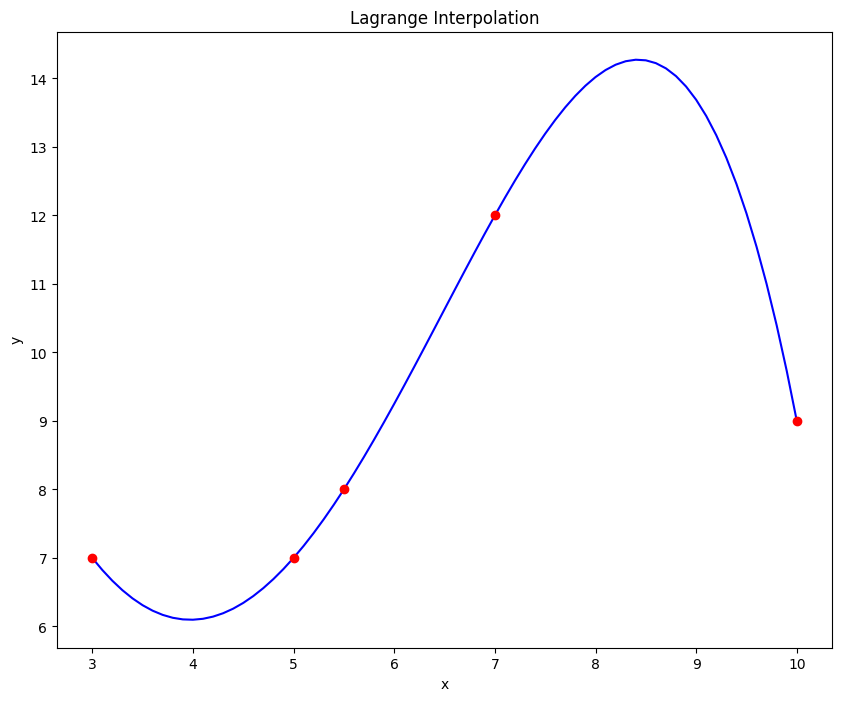

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define dataset

x = [3,5,5.5,7,10]
y = [7,7,8,12,9]

f = lagrange(x,y)

x_new = np.arange(3,10.1,0.1)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, '-b')
plt.plot(x,y, 'ro')
plt.title('Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Newton's Polynomial
Another form of interpolation that can be useful is known as a Newton's Polynomial with the form:

$f(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1)... +a_n(x-x_0)(x-x_1)...(x-x_n)$

Importantly, the coefficients $a_i$ can be determined with a simple process through solving the equation for each of the given data points. This process is known as a divided difference which is implemented below.

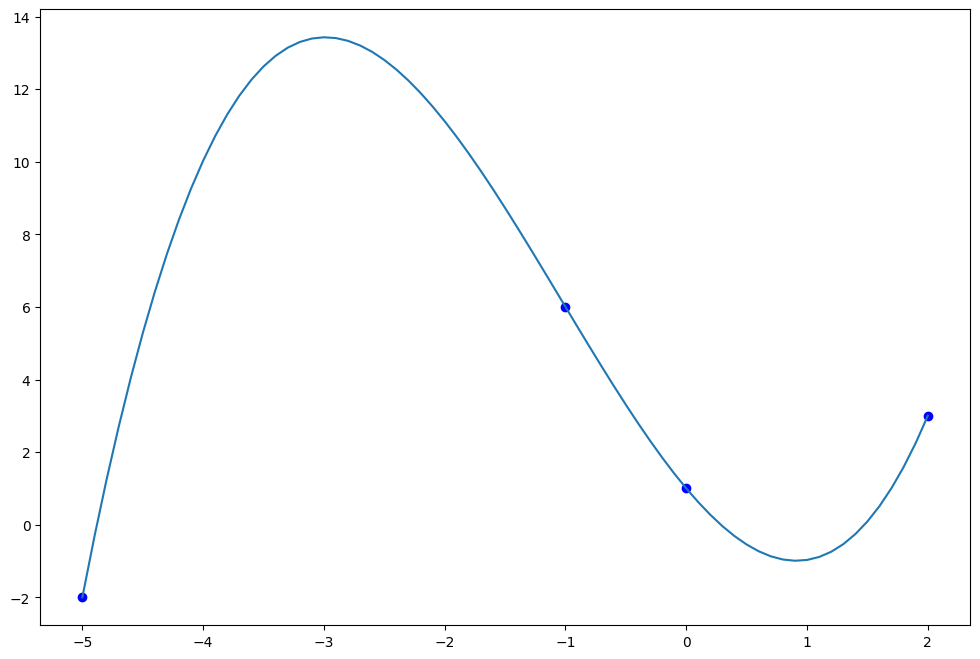

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x,y):

  n = len(y)
  coef = np.zeros([n,n])
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):

  n = len(x_data)-1
  p = coef[n]
  for k in range(1,n+1):
      p = coef[n-k] + (x - x_data[n-k])*p
  return p

x = np.array([-5,-1,0,2])
y = np.array([-2,6,1,3])
a_s = divided_diff(x,y)[0,:]

x_new = np.arange(-5,2.1,.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x,y, 'bo')
plt.plot(x_new,y_new)

One major upside of using Newton's Polynomial is that including additional data points does not require old $a_n$ values to be recalulated. Instead, another term is just tacked to the end of the equation.